In [10]:
import dask.dataframe as dd

# Load the dataset from the current directory
df = dd.read_csv('delays_2018.csv', assume_missing=True)

# Check the first few rows (trigger computation)
df.head()


,date,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-1,MQ,Envoy Air,BIS,"Bismarck/Mandan, ND: Bismarck Municipal",5.0,3.0,1.00,0.06,1.94,0.0,0.00,0.0,0.0,104.0,54.0,1.0,49.0,0.0,0.0
1,2018-1,MQ,Envoy Air,BNA,"Nashville, TN: Nashville International",110.0,21.0,7.17,1.16,6.76,0.0,5.92,3.0,0.0,897.0,344.0,37.0,226.0,0.0,290.0
2,2018-1,MQ,Envoy Air,BOI,"Boise, ID: Boise Air Terminal",32.0,8.0,0.22,0.35,5.61,0.0,1.82,0.0,0.0,353.0,9.0,18.0,233.0,0.0,93.0
3,2018-1,MQ,Envoy Air,BPT,"Beaumont/Port Arthur, TX: Jack Brooks Regional",63.0,11.0,1.75,1.08,2.98,0.0,5.19,3.0,0.0,657.0,83.0,34.0,130.0,0.0,410.0
4,2018-1,MQ,Envoy Air,BUF,"Buffalo, NY: Buffalo Niagara International",31.0,12.0,0.82,3.00,6.62,0.0,1.55,0.0,0.0,484.0,27.0,136.0,207.0,0.0,114.0


Top 5 Airlines with Most Delayed Flights (>15 min):
Carrier
WN    260350.0
AA    180794.0
OO    143012.0
DL    130189.0
UA    119644.0
Name: arr_del15, dtype: float64

Arrival Airports with Highest Avg Delay (min):
Dest
YNG    59.500000
PPG    48.470014
CMX    25.922292
OTH    25.404440
SHD    24.764111
Name: ArrDelay, dtype: float64

Top 5 Carrier‑Airport Months by Total Delay (min):
      Carrier Dest  Month  arr_delay
8617       DL  ATL      6   370937.0
10340      DL  ATL      7   262779.0
1207       DL  ATL      1   240743.0
10116      AA  DFW      7   225174.0
12618      DL  ATL      8   213951.0


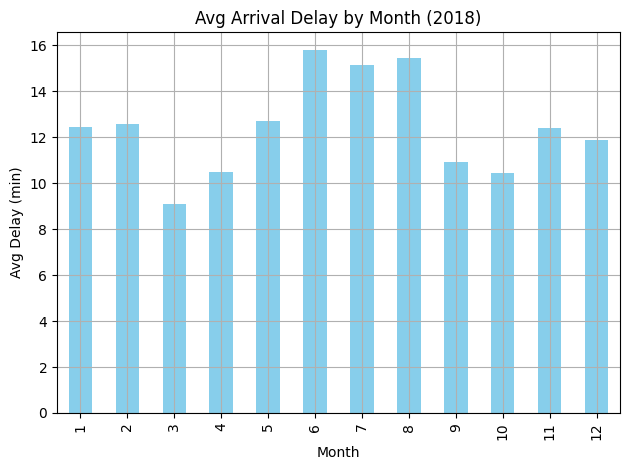

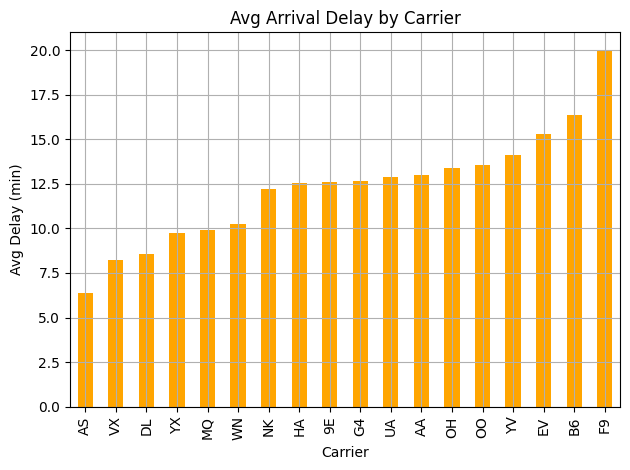

In [16]:
# 0. import library
import dask.dataframe as dd
import matplotlib.pyplot as plt

# 1. Load dataset

df = dd.read_csv('delays_2018.csv', assume_missing=True)

# 2. Clean columns and parse date
df.columns = df.columns.str.strip()
df['date'] = dd.to_datetime(df['date'], format='%Y-%m')

# 3. Derive useful fields
df['Carrier'] = df['carrier']
df['ArrDelay'] = df['arr_delay'] / df['arr_flights']  # average arrival delay per flight
df['Month'] = df['date'].dt.month
df['Dest'] = df['airport']
df['FlightCount'] = df['arr_flights']

# 4. Drop rows with NaNs
df = df.dropna(subset=['Carrier', 'ArrDelay', 'Month', 'Dest', 'FlightCount'])

# 5. Analysis

# 5.1 Top 5 carriers with most delayed flights (arr_del15)
top5_airlines = df.groupby('Carrier')['arr_del15'].sum().compute().nlargest(5)
print("Top 5 Airlines with Most Delayed Flights (>15 min):")
print(top5_airlines)

# 5.2 Airports with Highest Avg Arrival Delay (minutes)
avg_delay_airports = df.groupby('Dest')['ArrDelay'].mean().compute().nlargest(5)
print("\nArrival Airports with Highest Avg Delay (min):")
print(avg_delay_airports)

# 5.3 Top 5 Largest Total Delay Events
# (selecting months where total delay is highest for a carrier-airport)
largest_delays = df.nlargest(5, 'arr_delay')[['Carrier', 'Dest', 'Month', 'arr_delay']].compute()
print("\nTop 5 Carrier‑Airport Months by Total Delay (min):")
print(largest_delays)

# 6. Visualization

# 6.1 Monthly trend in average arrival delay
monthly_delay = df.groupby('Month')['ArrDelay'].mean().compute()
monthly_delay.plot(kind='bar', color='skyblue', title='Avg Arrival Delay by Month (2018)')
plt.xlabel('Month')
plt.ylabel('Avg Delay (min)')
plt.grid(True)
plt.tight_layout()
plt.savefig('task1_month.jpg')
plt.show()

# 6.2 Carrier performance: average delay per carrier
carrier_perf = df.groupby('Carrier')['ArrDelay'].mean().compute().sort_values()
carrier_perf.plot(kind='bar', color='orange', title='Avg Arrival Delay by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Avg Delay (min)')
plt.grid(True)
plt.tight_layout()
plt.savefig('task1_carrier.jpg')
plt.show()

